In [4]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
#Random global
seed = 12345
rng = np.random.default_rng(seed)  # can be called without a seed
rng.random()


df = pd.read_csv (r"C:\Users\White\Desktop\tfg\generados\scaled.csv")

In [5]:
X = df.copy()
y = X.pop("LabelA")

rfecv7 = RFECV(estimator=DecisionTreeClassifier(), 
              step=10,
              cv=StratifiedKFold(n_splits=5, random_state=14, shuffle=True),
              scoring='accuracy')
rfecv7.fit(X, y)



RFECV(cv=StratifiedKFold(n_splits=5, random_state=14, shuffle=True),
      estimator=DecisionTreeClassifier(), scoring='accuracy', step=10)

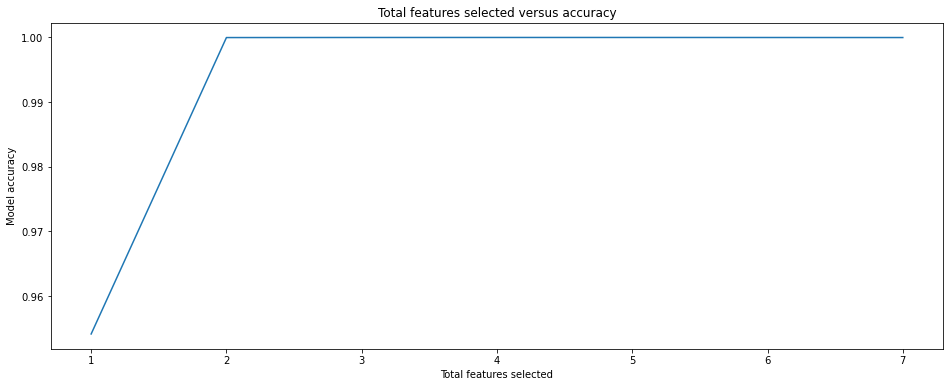

Optimum number of features: 31


In [6]:
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus accuracy')
plt.xlabel('Total features selected')
plt.ylabel('Model accuracy')
plt.plot(range(1, len(rfecv7.grid_scores_) + 1), rfecv7.grid_scores_)
plt.show()
print("Optimum number of features: %d" % rfecv7.n_features_)

selected_features = rfecv7.get_support(1)
X7=X[X.columns[selected_features]]

In [7]:
X7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334380 entries, 0 to 334379
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Src Port          334380 non-null  float64
 1   Dst Port          334380 non-null  float64
 2   Tot Fwd Pkts      334380 non-null  float64
 3   Fwd Pkt Len Min   334380 non-null  float64
 4   Fwd Pkt Len Mean  334380 non-null  float64
 5   Bwd Pkt Len Max   334380 non-null  float64
 6   Bwd Pkt Len Min   334380 non-null  float64
 7   Flow Byts/s       334380 non-null  float64
 8   Flow IAT Mean     334380 non-null  float64
 9   Flow IAT Min      334380 non-null  float64
 10  Fwd IAT Tot       334380 non-null  float64
 11  Fwd IAT Mean      334380 non-null  float64
 12  Fwd IAT Max       334380 non-null  float64
 13  Fwd IAT Min       334380 non-null  float64
 14  Bwd IAT Mean      334380 non-null  float64
 15  Bwd IAT Max       334380 non-null  float64
 16  Bwd Header Len    33

In [21]:
X7.to_csv(r"C:\Users\White\Desktop\tfg\generados\RFECved.csv", index = None, header=True) 


In [4]:
X7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334380 entries, 0 to 334379
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Src Port          334380 non-null  float64
 1   Dst Port          334380 non-null  float64
 2   Tot Fwd Pkts      334380 non-null  float64
 3   Fwd Pkt Len Min   334380 non-null  float64
 4   Fwd Pkt Len Mean  334380 non-null  float64
 5   Bwd Pkt Len Max   334380 non-null  float64
 6   Bwd Pkt Len Min   334380 non-null  float64
 7   Flow Byts/s       334380 non-null  float64
 8   Flow IAT Mean     334380 non-null  float64
 9   Flow IAT Min      334380 non-null  float64
 10  Fwd IAT Tot       334380 non-null  float64
 11  Fwd IAT Max       334380 non-null  float64
 12  Bwd IAT Mean      334380 non-null  float64
 13  Bwd Header Len    334380 non-null  float64
 14  Fwd Pkts/s        334380 non-null  float64
 15  Pkt Len Min       334380 non-null  float64
 16  Active Max        33

---------------------------------------------------

In [5]:
X = df.copy()
y = X.pop("LabelA")
rfecv10 = RFECV(estimator=DecisionTreeClassifier(), 
              step=1, 
              cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv10.fit(X, y)


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=DecisionTreeClassifier(), scoring='accuracy')

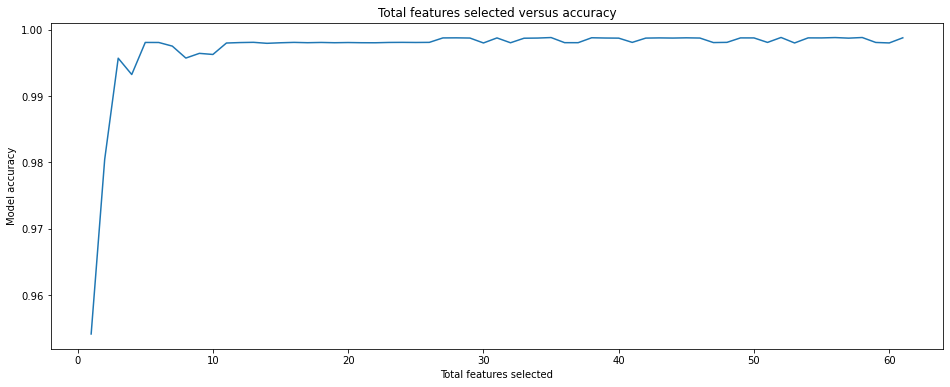

Optimum number of features: 52


In [6]:
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus accuracy')
plt.xlabel('Total features selected')
plt.ylabel('Model accuracy')
plt.plot(range(1, len(rfecv10.grid_scores_) + 1), rfecv10.grid_scores_)
plt.show()
print("Optimum number of features: %d" % rfecv10.n_features_)

selected_features = rfecv10.get_support(1)
X10=X[X.columns[selected_features]]

In [7]:
X10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334380 entries, 0 to 334379
Data columns (total 52 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Src Port            334380 non-null  float64
 1   Dst Port            334380 non-null  float64
 2   Tot Fwd Pkts        334380 non-null  float64
 3   Fwd Pkt Len Min     334380 non-null  float64
 4   Fwd Pkt Len Mean    334380 non-null  float64
 5   Bwd Pkt Len Max     334380 non-null  float64
 6   Bwd Pkt Len Min     334380 non-null  float64
 7   Flow Byts/s         334380 non-null  float64
 8   Flow IAT Mean       334380 non-null  float64
 9   Flow IAT Min        334380 non-null  float64
 10  Fwd IAT Tot         334380 non-null  float64
 11  Fwd IAT Mean        334380 non-null  float64
 12  Fwd IAT Max         334380 non-null  float64
 13  Fwd IAT Min         334380 non-null  float64
 14  Bwd IAT Tot         334380 non-null  float64
 15  Bwd IAT Mean        334380 non-nul

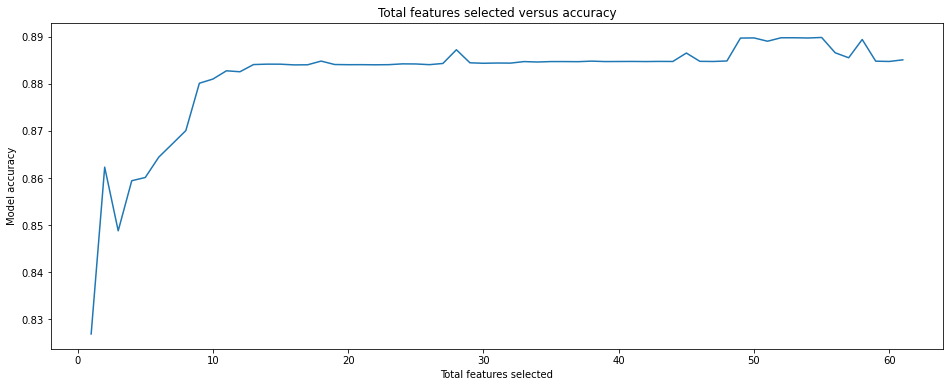

Optimum number of features: 55
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334380 entries, 0 to 334379
Data columns (total 55 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Src Port            334380 non-null  float64
 1   Dst Port            334380 non-null  float64
 2   Tot Fwd Pkts        334380 non-null  float64
 3   Fwd Pkt Len Min     334380 non-null  float64
 4   Fwd Pkt Len Mean    334380 non-null  float64
 5   Bwd Pkt Len Max     334380 non-null  float64
 6   Bwd Pkt Len Min     334380 non-null  float64
 7   Flow Byts/s         334380 non-null  float64
 8   Flow IAT Mean       334380 non-null  float64
 9   Flow IAT Min        334380 non-null  float64
 10  Fwd IAT Tot         334380 non-null  float64
 11  Fwd IAT Mean        334380 non-null  float64
 12  Fwd IAT Max         334380 non-null  float64
 13  Fwd IAT Min         334380 non-null  float64
 14  Bwd IAT Tot         334380 non-null  float64
 15  Bwd

In [8]:
from sklearn.ensemble import RandomForestClassifier

sX = df.copy()
#normalize the metrics
y = sX.pop("LabelA")

rfecvs7 = RFECV(estimator=RandomForestClassifier(n_estimators=100), 
              step=1, 
              cv=StratifiedKFold(7),
              scoring='accuracy')
rfecvs7.fit(sX, y)

      
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus accuracy')
plt.xlabel('Total features selected')
plt.ylabel('Model accuracy')
plt.plot(range(1, len(rfecvs7.grid_scores_) + 1), rfecvs7.grid_scores_)
plt.show()
print("Optimum number of features: %d" % rfecvs7.n_features_)

selected_features = rfecvs7.get_support(1)
XS7=X[X.columns[selected_features]]
XS7.info()

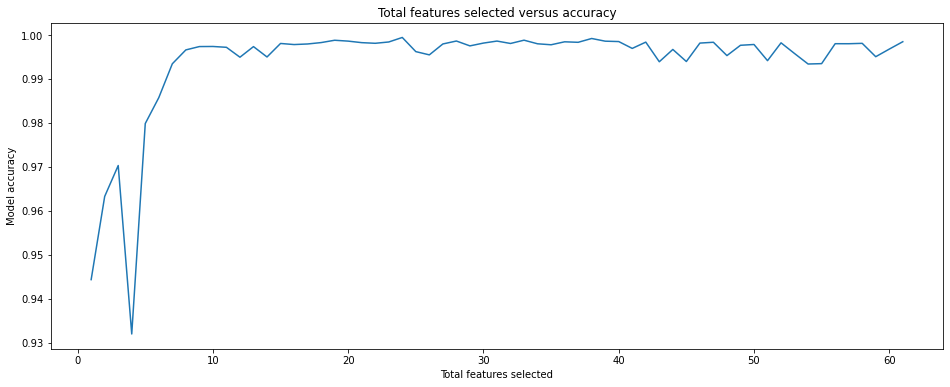

Optimum number of features: 24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334380 entries, 0 to 334379
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Src Port          334380 non-null  float64
 1   Dst Port          334380 non-null  float64
 2   Tot Fwd Pkts      334380 non-null  float64
 3   Flow Byts/s       334380 non-null  float64
 4   Flow IAT Min      334380 non-null  float64
 5   Fwd IAT Tot       334380 non-null  float64
 6   Bwd IAT Mean      334380 non-null  float64
 7   Fwd Header Len    334380 non-null  float64
 8   Bwd Header Len    334380 non-null  float64
 9   Fwd Pkts/s        334380 non-null  float64
 10  Pkt Len Min       334380 non-null  float64
 11  Pkt Len Max       334380 non-null  float64
 12  Bwd Seg Size Avg  334380 non-null  float64
 13  Subflow Bwd Byts  334380 non-null  float64
 14  Weekend           334380 non-null  float64
 15  hx                334380 non-null  fl

In [10]:
from sklearn.ensemble import RandomForestClassifier

sX = df.copy()
#normalize the metrics
y = sX.pop("LabelA")

rfecvs10 = RFECV(estimator=RandomForestClassifier(n_estimators=10), 
              step=1, 
              cv=StratifiedKFold(10),
              scoring='accuracy')
rfecvs10.fit(sX, y)

      
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus accuracy')
plt.xlabel('Total features selected')
plt.ylabel('Model accuracy')
plt.plot(range(1, len(rfecvs10.grid_scores_) + 1), rfecvs10.grid_scores_)
plt.show()
print("Optimum number of features: %d" % rfecvs10.n_features_)

selected_features = rfecvs10.get_support(1)
XS10=X[X.columns[selected_features]]
XS10.info()

In [11]:
from sklearn.ensemble import RandomForestClassifier

sX = df.copy()
#normalize the metrics
y = sX.pop("LabelA")

rfecvs110 = RFECV(estimator=RandomForestClassifier(n_estimators=10), 
              step=1, 
              cv=StratifiedKFold(15),
              scoring='accuracy')
rfecvs110.fit(sX, y)

      

RFECV(cv=StratifiedKFold(n_splits=15, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(n_estimators=10), scoring='accuracy')

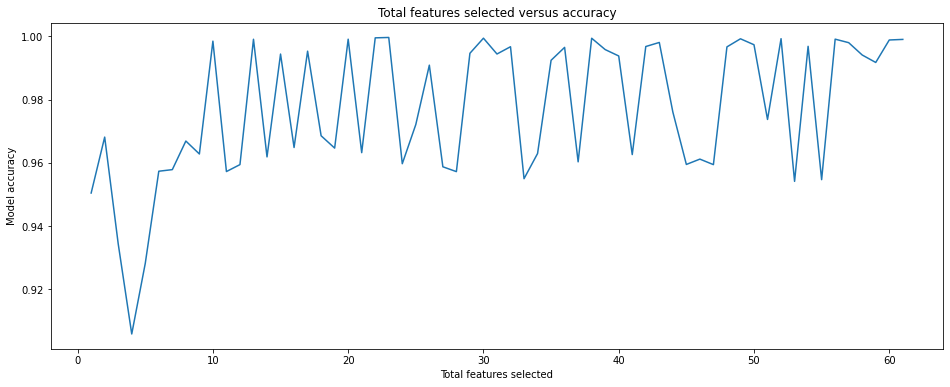

Optimum number of features: 23
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334380 entries, 0 to 334379
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Src Port         334380 non-null  float64
 1   Dst Port         334380 non-null  float64
 2   Tot Fwd Pkts     334380 non-null  float64
 3   Bwd Pkt Len Min  334380 non-null  float64
 4   Flow Byts/s      334380 non-null  float64
 5   Flow IAT Min     334380 non-null  float64
 6   Fwd IAT Tot      334380 non-null  float64
 7   Bwd IAT Mean     334380 non-null  float64
 8   Bwd IAT Max      334380 non-null  float64
 9   Fwd Header Len   334380 non-null  float64
 10  Bwd Header Len   334380 non-null  float64
 11  Fwd Pkts/s       334380 non-null  float64
 12  Pkt Len Min      334380 non-null  float64
 13  Pkt Len Max      334380 non-null  float64
 14  Weekend          334380 non-null  float64
 15  hx               334380 non-null  float64
 16  hy     

In [12]:
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus accuracy')
plt.xlabel('Total features selected')
plt.ylabel('Model accuracy')
plt.plot(range(1, len(rfecvs110.grid_scores_) + 1), rfecvs110.grid_scores_)
plt.show()
print("Optimum number of features: %d" % rfecvs110.n_features_)

selected_features = rfecvs110.get_support(1)
XS110=X[X.columns[selected_features]]
XS110.info()

In [ ]:
from sklearn.svm import SVC
estimator = SVC(kernel="linear")
#RFE
X = df.copy()
y = X.pop("LabelA")

rfecv7s = RFECV(estimator=estimator, 
              step=1, 
              cv=StratifiedKFold(5),
              scoring='accuracy')
rfecv7s.fit(X, y)

In [ ]:
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus accuracy')
plt.xlabel('Total features selected')
plt.ylabel('Model accuracy')
plt.plot(range(1, len(rfecv7s.grid_scores_) + 1), rfecv7s.grid_scores_)
plt.show()
print("Optimum number of features: %d" % rfecv7s.n_features_)

selected_features = rfecv7s.get_support(1)
X=X[X.columns[selected_features]]
X.info()

In [3]:
from sklearn.svm import LinearSVC
estimator = LinearSVC()
#RFE
X = df.copy()
y = X.pop("LabelA")

rfecv10s = RFECV(estimator=estimator, 
              step=1, 
              cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv10s.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LinearSVC(), scoring='accuracy')

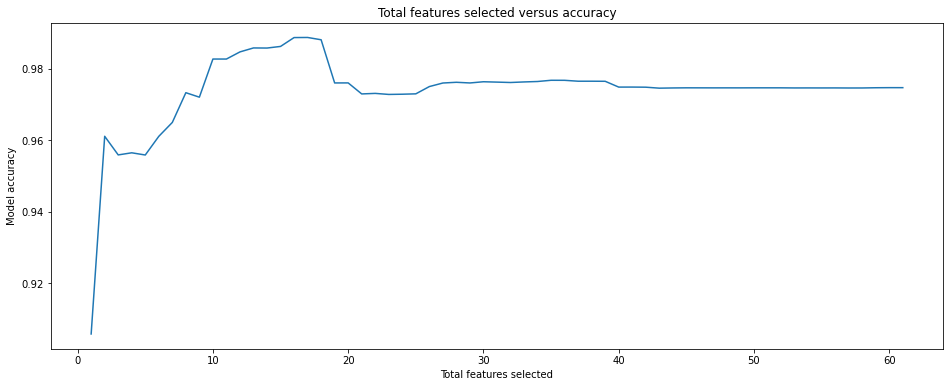

Optimum number of features: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334380 entries, 0 to 334379
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Bwd Pkt Len Min     334380 non-null  float64
 1   Bwd IAT Tot         334380 non-null  float64
 2   Bwd IAT Max         334380 non-null  float64
 3   Bwd URG Flags       334380 non-null  float64
 4   Active Mean         334380 non-null  float64
 5   Active Min          334380 non-null  float64
 6   Weekend             334380 non-null  float64
 7   Src_DNS             334380 non-null  float64
 8   Src_HTTPS           334380 non-null  float64
 9   Dst_DNS             334380 non-null  float64
 10  Dst_HTTPS           334380 non-null  float64
 11  Src_Mininet         334380 non-null  float64
 12  Src_Outside         334380 non-null  float64
 13  Dst_Metasploitable  334380 non-null  float64
 14  Dst_Mininet         334380 non-null  float64
 15  Dst

In [4]:
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus accuracy')
plt.xlabel('Total features selected')
plt.ylabel('Model accuracy')
plt.plot(range(1, len(rfecv10s.grid_scores_) + 1), rfecv10s.grid_scores_)
plt.show()
print("Optimum number of features: %d" % rfecv10s.n_features_)

selected_features = rfecv10s.get_support(1)
X=X[X.columns[selected_features]]
X.info()